Shubham Singh, shubhamusingh@gmail.com 8080811516

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report


In [2]:
df=pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape

(6362620, 11)

# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df['nameDest']

0          M1979787155
1          M2044282225
2           C553264065
3            C38997010
4          M1230701703
              ...     
6362615     C776919290
6362616    C1881841831
6362617    C1365125890
6362618    C2080388513
6362619     C873221189
Name: nameDest, Length: 6362620, dtype: object

In [6]:
# To know str value
print(df['nameOrig'].str[0].unique())
print('*'*50)
df['nameDest'].str[0].unique()

['C']
**************************************************


array(['M', 'C'], dtype=object)

In [7]:
#replacing str from the column and replacing it with 9 and 7 so the essence of the column remain same ,converting it into numerical column
df['nameDest'] = df['nameDest'].str.replace("C", "9").str.replace("M", "7")
df['nameDest'] = df['nameDest'].astype(np.int64)

df['nameDest']

0          71979787155
1          72044282225
2           9553264065
3            938997010
4          71230701703
              ...     
6362615     9776919290
6362616    91881841831
6362617    91365125890
6362618    92080388513
6362619     9873221189
Name: nameDest, Length: 6362620, dtype: int64

In [8]:
#replacing str from the column and replacing it with  9 so the essence of the column remain same ,converting it into numerical column
df['nameOrig'] = df['nameOrig'].str.replace("C", "9")
df['nameDest'] = df['nameDest'].astype(np.int64)
df['nameOrig']

0          91231006815
1          91666544295
2          91305486145
3           9840083671
4          92048537720
              ...     
6362615     9786484425
6362616    91529008245
6362617    91162922333
6362618    91685995037
6362619    91280323807
Name: nameOrig, Length: 6362620, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 534.0+ MB


<AxesSubplot:xlabel='amount'>

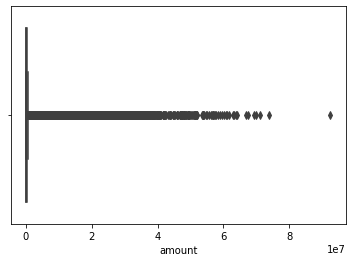

In [10]:
sns.boxplot(x=df["amount"]) #there is one outlier but no need of removing it as it can be a fraud case

<AxesSubplot:xlabel='type', ylabel='count'>

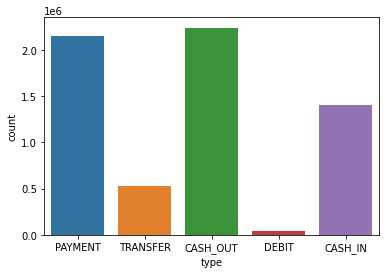

In [11]:
sns.countplot(df['type']) 

In [12]:
df[((df['type'] == 'TRANSFER') | (df['type'] == 'CASH_OUT') | (df['type'] == 'DEBIT') | (df['type'] == 'CASH_IN')) & (df['isFraud'] == 1)]



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,91305486145,181.00,0.0,9553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,9840083671,181.00,0.0,938997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,91420196421,2806.00,0.0,9972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,92101527076,2806.00,0.0,91007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,9137533655,20128.00,0.0,91848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,9786484425,339682.13,0.0,9776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,91529008245,6311409.28,0.0,91881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,91162922333,6311409.28,0.0,91365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,91685995037,850002.52,0.0,92080388513,0.00,0.00,1,0


This line of code is filtering the dataframe 'df' to only include rows where the value in the 'type' column is either 'TRANSFER', 'CASH_OUT', 'DEBIT', or 'CASH_IN' and where the value in the 'isFraud' column is equal to 1. The result is a new dataframe that only includes instances of fraud that fall within the specified types of transactions.

In [13]:
df[((df['type'] == 'TRANSFER') | (df['type'] == 'CASH_OUT') | (df['type'] == 'DEBIT') | (df['type'] == 'CASH_IN')) & ((df['isFraud'] == 1)&(df.newbalanceDest==0.00))]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,91305486145,181.00,0.0,9553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,9840083671,181.00,0.0,938997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.00,91420196421,2806.00,0.0,9972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.00,92101527076,2806.00,0.0,91007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.00,9137533655,20128.00,0.0,91848415041,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,9778071008,63416.99,0.0,91812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,91531301470,1258818.82,0.0,91470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,92013999242,339682.13,0.0,91850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,91529008245,6311409.28,0.0,91881841831,0.0,0.0,1,0


This line of code filters the dataframe (df) to only include rows where the type is either "TRANSFER", "CASH_OUT", "DEBIT", or "CASH_IN" and the value in the isFraud column is 1, and the value in the newbalanceDest column is 0.00. This helps to isolate instances of fraud where the full amount was stolen and the newbalanceDest value is 0.00

# we can see out of 8213 rows 4091 rows are where newbalanceDest is 0 i.e almost 50% time full amount is looted 

In [14]:
grouped = df[df['isFraud'] == 1].groupby('type')
print(grouped['type'].unique())

type
CASH_OUT    [CASH_OUT]
TRANSFER    [TRANSFER]
Name: type, dtype: object


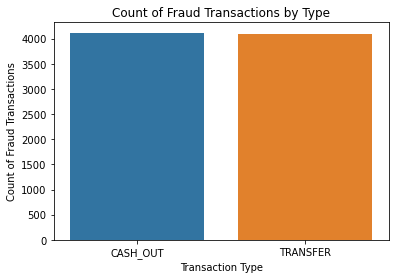

In [15]:
grouped = df[df['isFraud'] == 1].groupby('type').size().reset_index(name='counts')

# Plot the count of each type
sns.barplot(x='type', y='counts', data=grouped)
plt.title('Count of Fraud Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count of Fraud Transactions')
plt.show()
#It can be observed that instances of fraud in the data only occur in the 'cash_out' and 'transfer' categories of the 'type' column

In [16]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [17]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [18]:
df.isFraud.value_counts() #class 1 is minority class

0    6354407
1       8213
Name: isFraud, dtype: int64

In [19]:
df.isFraud.value_counts()/len(df.isFraud)*100

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

In [20]:
df.isFlaggedFraud.value_counts()/len(df.isFlaggedFraud)*100

0    99.999749
1     0.000251
Name: isFlaggedFraud, dtype: float64

<AxesSubplot:>

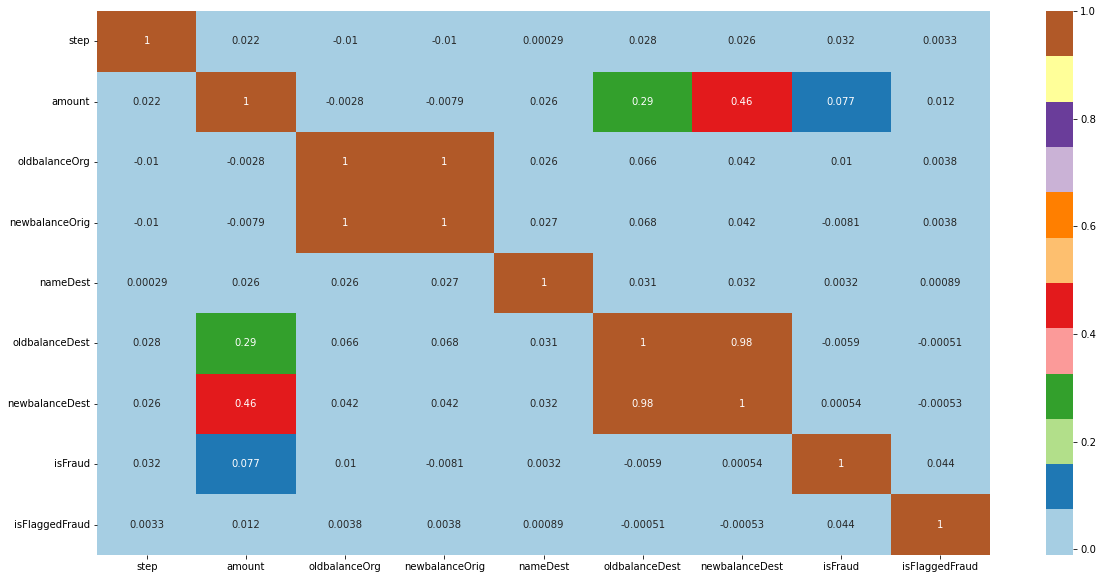

In [21]:

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="Paired")

#Multicollinearity exists between oldbalanceOrg and newbalanceOrg, as well as between oldbalanceDest and newbalanceDest. To mitigate the effects of this multicollinearity, I will use Principal Component Analysis (PCA) to reduce the weight of these highly correlated columns.

In [22]:
one = OneHotEncoder()
df[list(df["type"].unique())] = one.fit_transform(df[["type"]]).A
df.drop("type",axis = 1, inplace = True)
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,PAYMENT,TRANSFER,CASH_OUT,DEBIT,CASH_IN
0,1,9839.64,91231006815,170136.00,160296.36,71979787155,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
1,1,1864.28,91666544295,21249.00,19384.72,72044282225,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
2,1,181.00,91305486145,181.00,0.00,9553264065,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0
3,1,181.00,9840083671,181.00,0.00,938997010,21182.00,0.00,1,0,0.0,1.0,0.0,0.0,0.0
4,1,11668.14,92048537720,41554.00,29885.86,71230701703,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,9786484425,339682.13,0.00,9776919290,0.00,339682.13,1,0,0.0,1.0,0.0,0.0,0.0
6362616,743,6311409.28,91529008245,6311409.28,0.00,91881841831,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0
6362617,743,6311409.28,91162922333,6311409.28,0.00,91365125890,68488.84,6379898.11,1,0,0.0,1.0,0.0,0.0,0.0
6362618,743,850002.52,91685995037,850002.52,0.00,92080388513,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0


In [23]:
x = df.drop(columns=['isFraud'])
y = df['isFraud']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [25]:
# scaling 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#balancing the dataset as class 1 is minority class

sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)
y_train.value_counts()

0    4448040
1    4448040
Name: isFraud, dtype: int64

In [27]:
#getting rid of Multicollinearity using PCA

pca = PCA(n_components=13)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.45348636e-01, 2.50185063e-02, 7.77032929e-03, 4.53924234e-03,
       3.86869738e-03, 3.72841657e-03, 2.69852800e-03, 2.43687985e-03,
       2.12871258e-03, 1.24495611e-03, 1.10841318e-03, 8.58096407e-05,
       2.28728365e-05])

# Logistic Regression

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
print('AUC-ROC:', roc_auc_score(y_test, y_pred))
print('*'*80)
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('*'*80)
print(classification_report(y_test,y_pred))

AUC-ROC: 0.9681809570454653
********************************************************************************
Confusion Matrix: [[1819725   86642]
 [     44    2375]]
********************************************************************************
              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1906367
           1       0.03      0.98      0.05      2419

    accuracy                           0.95   1908786
   macro avg       0.51      0.97      0.51   1908786
weighted avg       1.00      0.95      0.98   1908786



Describe your fraud detection model in elaboration ? 
>> In this project, the task was to detect fraudulent transactions in a financial dataset. The first step was to transform the string values in the columns nameOrig and nameDest by replacing specific substrings with numerical values 9 and 7. This conversion was done to preserve the essence of the column while enabling numerical processing. As encoding was not feasible due to the large size of the dataset, this alternative solution was adopted.
During the data exploration stage, a single outlier was detected, but it was suspected to be a fraud case. Further analysis revealed that only the Transfer and Cash-out categories in the type column were involved in fraud. The heatmap was used to identify the existence of multicollinearity between oldbalanceOrg and newbalanceOrg, as well as between oldbalanceDest and newbalanceDest. To mitigate this issue, Principal Component Analysis (PCA) was employed to reduce the weight of these highly correlated columns.
As class 1, which represents fraud cases, was a minority class in the dataset, Synthetic Minority Over-sampling Technique (SMOTE) was used to balance the class distribution. Finally, the logistic regression model was trained and achieved an accuracy of 95%.

How did you select variables to be included in the model?
>> The selection of variables to be included in the model was based on the results of Principal Component Analysis (PCA). The PCA was used to identify and mitigate the effects of multicollinearity that existed between certain variables. The outcome of the PCA helped to reduce the weight of highly correlated variables, which in turn helped in selecting the most important and relevant variables for the model.

What are the key factors that predict fraudulent customer?
>>  it was observed that the Transfer and Cash-out categories in the type column were the only instances that suffered from fraud. A significant finding was that out of the total 8213 instances, 4091 had a value of 0 in the newbalanceDest column, suggesting that almost 50% of the time, the full amount was stolen. These insights could prove useful in identifying patterns and implementing preventive measures against potential fraud cases.

Do these factors make sense? If yes, How? If not, How not? 
>>Yes, these factors make sense. It is important to understand the types of transactions and account activities that are most susceptible to fraud, as this information can be used to identify potential fraud cases and implement preventive measures. The finding that a large proportion of the instances where the full amount was stolen (i.e. newbalanceDest = 0) highlights the need for careful monitoring of these types of transactions.

What kind of prevention should be adopted while company update its infrastructure?
>> Implementing strong authentication processes to ensure secure access to sensitive information.
Encrypting sensitive information to prevent unauthorized access.
Monitoring network activity in real-time to detect and respond to security breaches.
Regularly updating software and systems to keep them secure against the latest threats.
Implementing strict access controls to limit access to sensitive information to authorized personnel only.

Assuming these actions have been implemented, how would you determine if they work?
>>To determine the effectiveness of the above-mentioned preventative measures, the company can perform regular security audits and assessments. These audits can be performed internally or by an independent third-party. The purpose of these audits is to identify any security vulnerabilities or weaknesses and determine if the measures implemented have been effective in preventing fraud.
Additionally, the company can track and analyze its network activity and security breach incidents to monitor for any new or recurring patterns. The company can also perform regular penetration testing to determine if their security measures can withstand real-world attacks.
Finally, it is important to continually monitor and update these measures as technology and fraud techniques evolve over time. This ensures that the company stays ahead of potential security threats and reduces the risk of fraud.